In [40]:
# Importing the basic libraries. 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pdb
import os
plt.style.use('seaborn-darkgrid')

In [41]:
# Loading the data. 查看当前目录下的文件
print(os.listdir('./'))

['.ipynb_checkpoints', 'Abalone Age Prediction.ipynb', 'abalone.csv', 'Ionosphere.ipynb', 'ionosphere_data.csv']


In [42]:
# Loading the data. 读入数据集
# we will check how good or bad the data is, that we already have. 
data = pd.read_csv('./abalone.csv')

In [43]:
# checking the data. 查看数据的形状大小
print(data.shape)

(4177, 9)


In [44]:
# checking the sample data for data. 查看前20条数据
data.head(20)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   
5    I   0.425     0.300   0.095        0.3515          0.1410   
6    F   0.530     0.415   0.150        0.7775          0.2370   
7    F   0.545     0.425   0.125        0.7680          0.2940   
8    M   0.475     0.370   0.125        0.5095          0.2165   
9    F   0.550     0.440   0.150        0.8945          0.3145   
10   F   0.525     0.380   0.140        0.6065          0.1940   
11   M   0.430     0.350   0.110        0.4060          0.1675   
12   M   0.490     0.380   0.135        0.5415          0.2175   
13   F   0.535     0.405   0.145        0.6845          0.2725   
14   F   0.470     0.355   0.100        0.4755          0.1675   
15   M   0.500     0.400   0.130        0.6645          0.2580   
16   I   0.355     0.280   0.085        0.2905          0.0950   
17   F   0.440     0.340   0.100        0.4510          0.1880   
18   M   0.365     0.295   0.080        0.2555          0.0970   
19   M   0.450     0.320   0.100        0.3810          0.1705   

    Viscera weight  Shell weight  Rings  
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  
5           0.0775         0.120      8  
6           0.1415         0.330     20  
7           0.1495         0.260     16  
8           0.1125         0.165      9  
9           0.1510         0.320     19  
10          0.1475         0.210     14  
11          0.0810         0.135     10  
12          0.0950         0.190     11  
13          0.1710         0.205     10  
14          0.0805         0.185     10  
15          0.1330         0.240     12  
16          0.0395         0.115      7  
17          0.0870         0.130     10  
18          0.0430         0.100      7  
19          0.0750         0.115      9

In [45]:
# checking basic statistics of data.  统计数据
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [46]:
# Checking the information about the data. 查看非缺失值总数
# this will tell us how many and what type of columns/rows we have in the data. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [47]:
# Count height's value = 0 查看Height属性值为0的个数，并删除
num = 0 
for i in enumerate(data['Height']):
    if i[1] == 0:
        num += 1
        data = data.drop(i[0])
        
print("Height = 0 has {0} items".format(num))

Height = 0 has 2 items


In [48]:
# Checking the information about the data. 查看非缺失值总数
# this will tell us how many and what type of columns/rows we have in the data. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


Let Rings feature add 1.5

There are two solutions.

Idea1: Directly rename "Rings" as "Ages" 

Code:

data['Rings'] = data['Rings']+1.5

data.rename(columns={'Rings': 'Ages'}, inplace=True)

In [49]:
# Idea2: Generate new column "Ages", and then delete the columns named "Rings"
# delete Rings 

data['Ages'] = data['Rings']+1.5
data = data.drop(columns='Rings')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Ages            4175 non-null   float64
dtypes: float64(8), object(1)
memory usage: 326.2+ KB


In [51]:
# Creating a list of columns which are numeric. 
numeric_cols = list(data.select_dtypes(exclude='object').columns)
numeric_cols

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Ages']

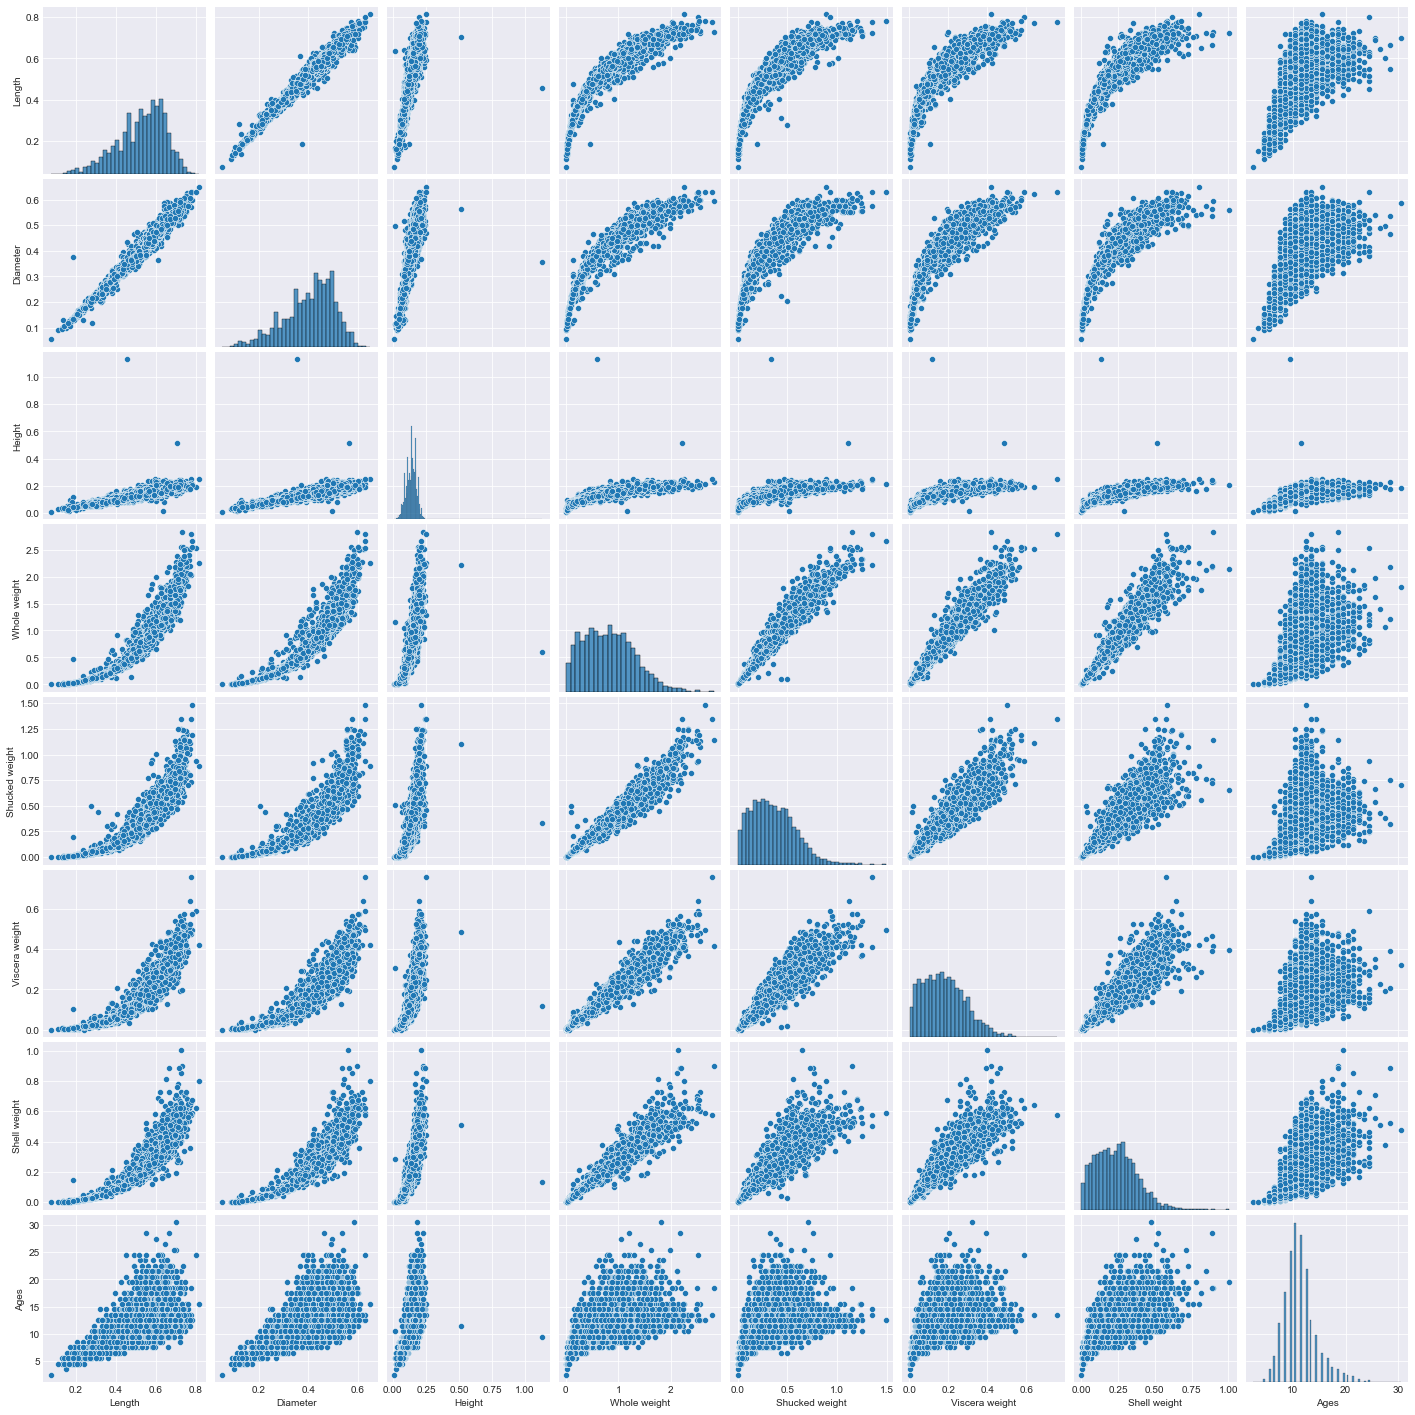

In [52]:
# For each numerical column, let's check the data distribution.  查看数据分布
# for this we are using seaborn library and try performing pairplotting
sns.pairplot(data[numeric_cols])
plt.show()

In [53]:
# In order to avoid columns name index into report, we should drop out the index firstly.
# 为了在生成数据集报告时不引入index索引，故将索引删去
d = data.reset_index(drop=True)

In [54]:
# using pandas profiler once to look into all the data columns. 
data_profile = pdb.ProfileReport(d)
data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# According to Radida Guideline, choose outliers and delete.    根据拉依达准则——（3σ）原则，去除异常点
def zscore(df):
    out = []
    m, sd = np.mean(df), np.std(df)  # 均值，方差
    for i in enumerate(df):
        n = i[0]
        i = i[1]
        z = i-m
        if np.abs(z) > 3*sd:
            out.append(n)
#             print(i)
#     print("Outliers:", out)
    return len(out), out 

In [56]:
numeric_cols = list(data.select_dtypes(exclude='object').columns)
print(len(numeric_cols))

numeric_cols = numeric_cols[:-1]  # delete Ages feature
print(numeric_cols)
print(len(numeric_cols))

8
['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
7


In [57]:
# According to Radida Guideline, choose outliers and delete. 
dele = []
for i in numeric_cols:
    i = str(i)
    _, t2 = zscore(data[i])
    print("dele {0} proportion: {1}".format(i ,_ / 4175))
    dele.extend(t2)
    
dele = list(set(dele))
dele.sort()
# print(type(dele))
print("Number of outlier: {0}".format(len(dele)))
print(dele)

# Delete outliers
data = data.drop(dele)

dele Length proportion: 0.003592814371257485
dele Diameter proportion: 0.0031137724550898203
dele Height proportion: 0.000718562874251497
dele Whole weight proportion: 0.004550898203592815
dele Shucked weight proportion: 0.008862275449101797
dele Viscera weight proportion: 0.005269461077844311
dele Shell weight proportion: 0.006467065868263473
Number of outlier: 91
[81, 129, 163, 164, 165, 166, 168, 170, 236, 237, 238, 239, 277, 334, 358, 526, 694, 696, 719, 720, 891, 1048, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1207, 1209, 1416, 1417, 1421, 1425, 1426, 1427, 1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1762, 1820, 1981, 1985, 1986, 2050, 2089, 2107, 2113, 2156, 2160, 2207, 2273, 2333, 2367, 2380, 2543, 2622, 2623, 2624, 2708, 2709, 2809, 2810, 2861, 2862, 3006, 3007, 3147, 3148, 3150, 3187, 3426, 3598, 3627, 3712, 3714, 3799, 3836, 3898, 3901, 3960, 3961, 4143, 4146]


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4084 non-null   object 
 1   Length          4084 non-null   float64
 2   Diameter        4084 non-null   float64
 3   Height          4084 non-null   float64
 4   Whole weight    4084 non-null   float64
 5   Shucked weight  4084 non-null   float64
 6   Viscera weight  4084 non-null   float64
 7   Shell weight    4084 non-null   float64
 8   Ages            4084 non-null   float64
dtypes: float64(8), object(1)
memory usage: 319.1+ KB


In [59]:
#　Extract X(data), Y(label) 提取X属性，Y属性
label = data['Ages'].copy()
data = data.drop('Ages', axis=1)

In [60]:
print("Data:{0}, Label:{1}".format(data.shape, label.shape))

Data:(4084, 8), Label:(4084,)


In [61]:
# Convert Sex feature to one-hot vectors
dummy_data = pd.get_dummies(data['Sex'])
print(dummy_data)

      F  I  M
0     0  0  1
1     0  0  1
2     1  0  0
3     0  0  1
4     0  1  0
...  .. .. ..
4172  1  0  0
4173  0  0  1
4174  0  0  1
4175  1  0  0
4176  0  0  1

[4084 rows x 3 columns]


In [62]:
print(data.info())
# Save origin data
origin_data = data
data = data.drop('Sex', axis=1)

# Add one-hot vectores
data = data.join(dummy_data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4084 non-null   object 
 1   Length          4084 non-null   float64
 2   Diameter        4084 non-null   float64
 3   Height          4084 non-null   float64
 4   Whole weight    4084 non-null   float64
 5   Shucked weight  4084 non-null   float64
 6   Viscera weight  4084 non-null   float64
 7   Shell weight    4084 non-null   float64
dtypes: float64(7), object(1)
memory usage: 287.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4084 non-null   float64
 1   Diameter        4084 non-null   float64
 2   Height          4084 non-null   float64
 3   Whole weight    4084 non-null   float64
 4   Shu

In [63]:
# Using pipeline processing data
# pipeline document url:https://scikit-learn.org/stable/modules/compose.html#combining-estimators

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# process = [('OHE', OneHotEncoder(handle_unknown='ignore')), ('MAS', MaxAbsScaler())]
process = [('sc', StandardScaler())]
pipe = Pipeline(process)
print(pipe)

Pipeline(steps=[('sc', StandardScaler())])


In [64]:
pipe.fit(data)
print(data)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  F  I  M  
0        

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4084 non-null   float64
 1   Diameter        4084 non-null   float64
 2   Height          4084 non-null   float64
 3   Whole weight    4084 non-null   float64
 4   Shucked weight  4084 non-null   float64
 5   Viscera weight  4084 non-null   float64
 6   Shell weight    4084 non-null   float64
 7   F               4084 non-null   uint8  
 8   I               4084 non-null   uint8  
 9   M               4084 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 396.3 KB


In [66]:
# pandas Dataframe -> numpy array
t1 = data.to_numpy()
t1 = t1[:, 1:]
print(t1.shape)
print(t1)

data = t1

(4084, 9)
[[0.365  0.095  0.514  ... 0.     0.     1.    ]
 [0.265  0.09   0.2255 ... 0.     0.     1.    ]
 [0.42   0.135  0.677  ... 1.     0.     0.    ]
 ...
 [0.475  0.205  1.176  ... 0.     0.     1.    ]
 [0.485  0.15   1.0945 ... 1.     0.     0.    ]
 [0.555  0.195  1.9485 ... 0.     0.     1.    ]]


In [67]:
# pandas Dataframe -> numpy array
label = label.to_numpy()
print(label.shape)

(4084,)


## Model Training

### LinearRegression Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from math import sqrt

kf = KFold(n_splits=5,shuffle=True, random_state=888)  # Initiate KFold
rmse = []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    # LinearRegression Model  线性回归模型
    model = LinearRegression(fit_intercept=True, n_jobs=-1)
    model.fit(train_data, train_label)
    y_pred = model.predict(test_data)

    rmse.append(sqrt(MSE(y_pred, test_label)))

print("RMSE:",sum(rmse) / len(rmse))


RMSE: 2.206462177351592


### DecisionTree Model

In [69]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run  决策树模型
model2 = DecisionTreeRegressor(random_state=1)

rmse = []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    # Fit model
    model2.fit(train_data, train_label)
    y_pred = model2.predict(test_data)
#     print(y_pred)
    rmse.append(sqrt(MSE(y_pred, test_label)))

print("RMSE:",sum(rmse) / len(rmse))

RMSE: 3.0093159419014563


### Support Vector Mechanics Model 

#### Linear kernel function Gaussian kernel function Sigmoid kernel function Polynomial Kernel Function

In [70]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.svm import LinearSVR
from statistics import mean

# SVM模型

 # ① 线性核函数
train_score, test_score, test_r2, test_rmse  = [], [], [], []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    # Fit model
    clf = LinearSVR(C=2)
    clf.fit(train_data, train_label)
    y_pred = clf.predict(test_data)
    
    
    train_score.append(clf.score(train_data,train_label))
    test_score.append(clf.score(test_data,test_label))
    mse = metrics.mean_squared_error(test_label,y_pred.reshape(-1,1))
    test_r2.append(metrics.r2_score(test_label,y_pred.reshape(-1,1)))
    rmse.append(sqrt(mse))

print("Linear kernel function")
# print("训练集评分：", mean(train_score))
# print("测试集评分：", mean(test_score))
# print("测试集R2分：",mean(test_r2))
print("Testset RMSE:", mean(rmse))
print("--"*10)


# ② 高斯核函数
train_score, test_score, test_r2, test_rmse  = [], [], [], []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    clf = SVR(kernel='rbf',C=10,gamma=0.1,coef0=0.1)
    clf.fit(train_data,train_label)
    y_pred = clf.predict(test_data)
    
    train_score.append(clf.score(train_data,train_label))
    test_score.append(clf.score(test_data,test_label))
    mse = metrics.mean_squared_error(test_label,y_pred.reshape(-1,1))
    test_r2.append(metrics.r2_score(test_label,y_pred.reshape(-1,1)))
    rmse.append(sqrt(mse))
    
print("Gaussian kernel function")
# print("训练集评分：", mean(train_score))
# print("测试集评分：", mean(test_score))
# print("测试集R2分：",mean(test_r2))
print("Testset RMSE:", mean(rmse))
print("--"*10)


# ③ sigmoid核函数
train_score, test_score, test_r2, test_rmse  = [], [], [], []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    clf = SVR(kernel='sigmoid',C=2)
    clf.fit(train_data,train_label)
    y_pred = clf.predict(test_data)
    
    train_score.append(clf.score(train_data,train_label))
    test_score.append(clf.score(test_data,test_label))
    mse = metrics.mean_squared_error(test_label,y_pred.reshape(-1,1))
    test_r2.append(metrics.r2_score(test_label,y_pred.reshape(-1,1)))
    rmse.append(sqrt(mse))
    
print("Sigmoid kernel function")
# print("训练集评分：", mean(train_score))
# print("测试集评分：", mean(test_score))
# print("测试集R2分：",mean(test_r2))
print("Testset RMSE:", mean(rmse))
print("--"*10)



# ④ 多项式核函数
train_score, test_score, test_r2, test_rmse  = [], [], [], []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    clf = SVR(kernel='poly',C=2)
    clf.fit(train_data,train_label)
    y_pred = clf.predict(test_data)
    
    train_score.append(clf.score(train_data,train_label))
    test_score.append(clf.score(test_data,test_label))
    mse = metrics.mean_squared_error(test_label,y_pred.reshape(-1,1))
    test_r2.append(metrics.r2_score(test_label,y_pred.reshape(-1,1)))
    rmse.append(sqrt(mse))

print("Polynomial Kernel Function")
# print("训练集评分：", mean(train_score))
# print("测试集评分：", mean(test_score))
# print("测试集R2分：",mean(test_r2))
print("Testset RMSE:", mean(rmse))

Testset RMSE: 2.6370868879155283


Gaussian kernel function
Testset RMSE: 2.5005107782946485


Sigmoid kernel function
Testset RMSE: 40.408007336448755


Polynomial Kernel Function
Testset RMSE: 32.770166912047245


In [71]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning using GrideSearchCV 调参
# clf = GridSearchCV(SVR(),param_grid={'kernel':['poly','sigmoid','rbf'],'C': [0.1,1,10],'gamma': [0.1,1,10]},cv=5)
# train_score, test_score, test_r2, test_rmse  = [], [], [], []
# clf.fit(data, label)
    
# print("best_param:",clf.best_params_)
# print("best_score:", clf.best_score_)

# best_param: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
# best_score: 0.484638398025748

In [72]:
# Choosing the best model hyperparameter
# 选择最佳模型参数——高斯核函数

train_score, test_score, test_r2, test_rmse  = [], [], [], []
for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_label, test_label = label[train_index], label[test_index]
    
    clf = SVR(kernel='rbf',C=10,gamma=10,coef0=0.1)
    clf.fit(train_data,train_label)
    y_pred = clf.predict(test_data)
    
    train_score.append(clf.score(train_data,train_label))
    test_score.append(clf.score(test_data,test_label))
    mse = metrics.mean_squared_error(test_label,y_pred.reshape(-1,1))
    test_r2.append(metrics.r2_score(test_label,y_pred.reshape(-1,1)))
    rmse.append(sqrt(mse))
    
# print("Gaussian kernel function")
# print("训练集评分：", mean(train_score))
# print("测试集评分：", mean(test_score))
# print("测试集R2分：",mean(test_r2))
print("Testset RMSE:", mean(rmse))
print("\n")

Testset RMSE: 27.667109842503145


